# Data Introduction and Package Selections
The selected data is about direct marketing campaigns of a Portuguese banking instutition. There are 41188 records and 20 attributes in the data set. The goal of the data is to predict if the client will subscribe to a term deposit (y/n). I will use Multilayer Perceptron (MLP) algorithm with the help of sklearn library. Firstly we will start with adding necessary packages. For reading and manipulating data I will use pandas package.

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import random
import itertools

## Reading Data

In [7]:
data = pd.read_csv('data/bank-data.csv', sep=';')

In [8]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


As printed from data head command, we can see the attributes and first 5 record of our data. We have some categorical attributes and for using in our model, we should encode them to numerical values with the LabelEncoder. After then we will remove the old columns and keep the encoded variables.

In [9]:
LE = LabelEncoder()
data['job_code'] = LE.fit_transform(data['job'])
data['marital_code'] = LE.fit_transform(data['marital'])
data['education_code'] = LE.fit_transform(data['education'])
data['housing_code'] = LE.fit_transform(data['housing'])
data['loan_code'] = LE.fit_transform(data['loan'])
data['contact_code'] = LE.fit_transform(data['contact'])
data['poutcome_code'] = LE.fit_transform(data['poutcome'])
data['day_of_week_code'] = LE.fit_transform(data['day_of_week'])
data['month_code'] = LE.fit_transform(data['month'])
data['subscribed'] = LE.fit_transform(data['y'])

In [10]:
data=data.drop(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome', \
                'day_of_week', 'month', 'default', 'pdays', 'y'], axis=1)

In [11]:
data.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_code,marital_code,education_code,housing_code,loan_code,contact_code,poutcome_code,day_of_week_code,month_code,subscribed
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,3,1,0,0,0,1,1,1,6,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,0,1,1,1,6,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,2,0,1,1,1,6,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,0,1,1,1,6,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,2,1,1,1,6,0


Now you can see the new dataset with encoded variables. Now we have all numerical variables.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               41188 non-null  int64  
 1   duration          41188 non-null  int64  
 2   campaign          41188 non-null  int64  
 3   previous          41188 non-null  int64  
 4   emp.var.rate      41188 non-null  float64
 5   cons.price.idx    41188 non-null  float64
 6   cons.conf.idx     41188 non-null  float64
 7   euribor3m         41188 non-null  float64
 8   nr.employed       41188 non-null  float64
 9   job_code          41188 non-null  int64  
 10  marital_code      41188 non-null  int64  
 11  education_code    41188 non-null  int64  
 12  housing_code      41188 non-null  int64  
 13  loan_code         41188 non-null  int64  
 14  contact_code      41188 non-null  int64  
 15  poutcome_code     41188 non-null  int64  
 16  day_of_week_code  41188 non-null  int64 

In [13]:
data.describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_code,marital_code,education_code,housing_code,loan_code,contact_code,poutcome_code,day_of_week_code,month_code,subscribed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,3.72458,1.172769,3.747184,1.071720,0.327425,0.365252,0.930101,2.004613,4.230868,0.112654
std,10.42125,259.279249,2.770014,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,3.59456,0.608902,2.136482,0.985314,0.723616,0.481507,0.362886,1.397575,2.320025,0.316173
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,2.00000,1.000000,3.000000,2.000000,0.000000,0.000000,1.000000,2.000000,4.000000,0.000000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,7.00000,2.000000,6.000000,2.000000,0.000000,1.000000,1.000000,3.000000,6.000000,0.000000
max,98.00000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,11.00000,3.000000,7.000000,2.000000,2.000000,1.000000,2.000000,4.000000,9.000000,1.000000


## Splitting Data

Now we will have the prepared data set for the model training. For training, testing and validating we should split our data to three pieces with the rates of %60, %20 and %20. We will use a random integer for the randomness splitting.

In [14]:
selector = [
    "age",
    "campaign",
    "previous",
    "duration",
    "emp.var.rate",
    "cons.price.idx",
    "cons.conf.idx",
    "euribor3m",
    "nr.employed",
    "job_code",
    "marital_code",
    "education_code",
    "housing_code",
    "loan_code",
    "contact_code",
    "poutcome_code",
    "day_of_week_code",
    "month_code",
]
SEED = random.randint(0, 1000)
X_train, X_test, y_train, y_test = train_test_split(data[selector], data['subscribed'], test_size=0.2, random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=SEED)

In [15]:
row_data = [len(X_train),len(X_test),len(X_val)]
row_data

[24712, 8238, 8238]

We will also standardize our features by removing the mean and scaling to unit variance. We will use StandartScaler from the scikit package for this process.

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

## Modelling
As understood from the trials with some hidden layer sizes and neuron size, increasing hidden layer and neuron size did not affect the accuracy for the results. Therefore we will use only one hidden layer with (n/2) 9 neurons. We will use logistics sigmoid function as the activation function. We will set the learning rate as 0.001 and iteration as 10000. And then we will train our model with training data. 

In [17]:
mlp = mlp = MLPClassifier(hidden_layer_sizes=(9,),
                    max_iter=10000,
                    activation = 'logistic',
                    learning_rate_init=0.001,
                    random_state=SEED
                    )

mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(9,), max_iter=10000,
              random_state=663)

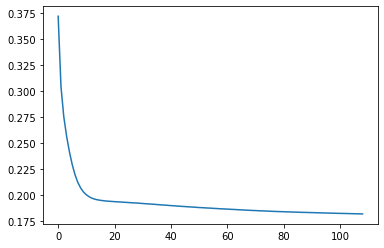

In [18]:
plt.plot(mlp.loss_curve_)
plt.show()

## Results for Training Data

In [58]:
predictions = mlp.predict(X_train)
cnf_matrix = confusion_matrix(y_train, predictions)
print(cnf_matrix)

[[21331   642]
 [ 1397  1342]]


Below we create the confusion matrix for our predictions.

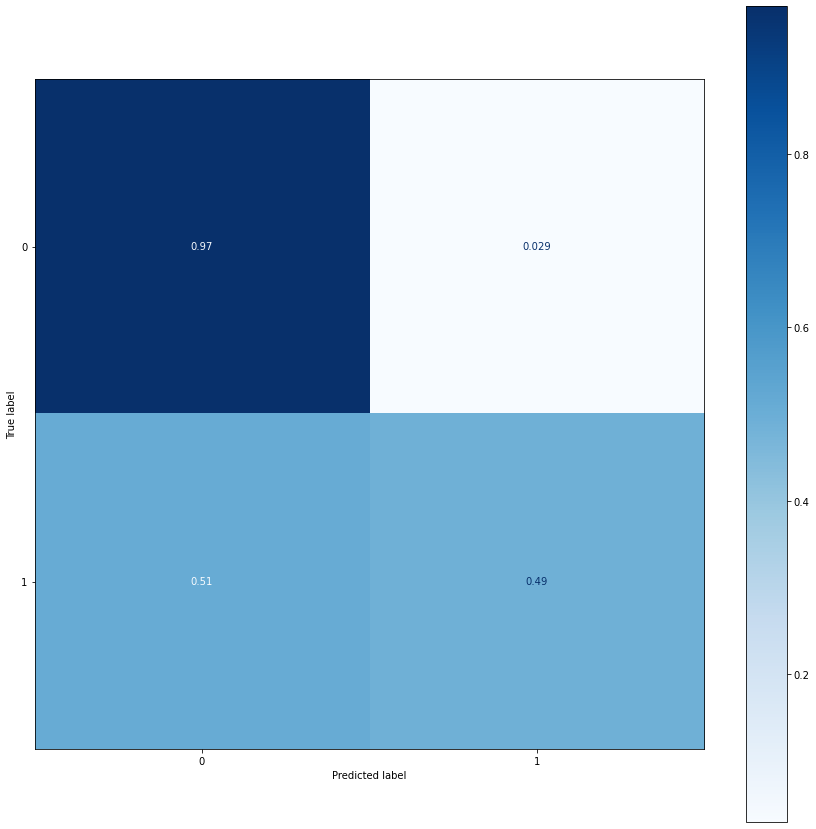

In [59]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(mlp, X_train, y_train, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

Now we can calculate precision, recall and f score for every class.

In [60]:
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     21973
           1       0.68      0.49      0.57      2739

    accuracy                           0.92     24712
   macro avg       0.81      0.73      0.76     24712
weighted avg       0.91      0.92      0.91     24712



In [61]:
macro_recall = recall_score(y_train, predictions, average = 'macro')
print('Average recall score (macro): {0:0.2f}'.format(macro_recall))

Average recall score (macro): 0.73


In [62]:
micro_recall = recall_score(y_train, predictions, average = 'micro')
print('Average recall score (micro): {0:0.2f}'.format(micro_recall))

Average recall score (micro): 0.92


In [63]:
macro_f1score = f1_score(y_train, predictions, average = 'macro')
print('Average f1 socre (macro): {0:0.2f}'.format(macro_f1score))

Average f1 socre (macro): 0.76


In [64]:
micro_f1score = f1_score(y_train, predictions, average = 'micro')
print('Average f1 score (micro): {0:0.2f}'.format(micro_f1score))

Average f1 score (micro): 0.92


## Results For Validation Data

In [65]:
predictions_val = mlp.predict(X_val)
cnf_matrix_val = confusion_matrix(y_val, predictions_val)
print(cnf_matrix_val)

[[7015  234]
 [ 508  481]]


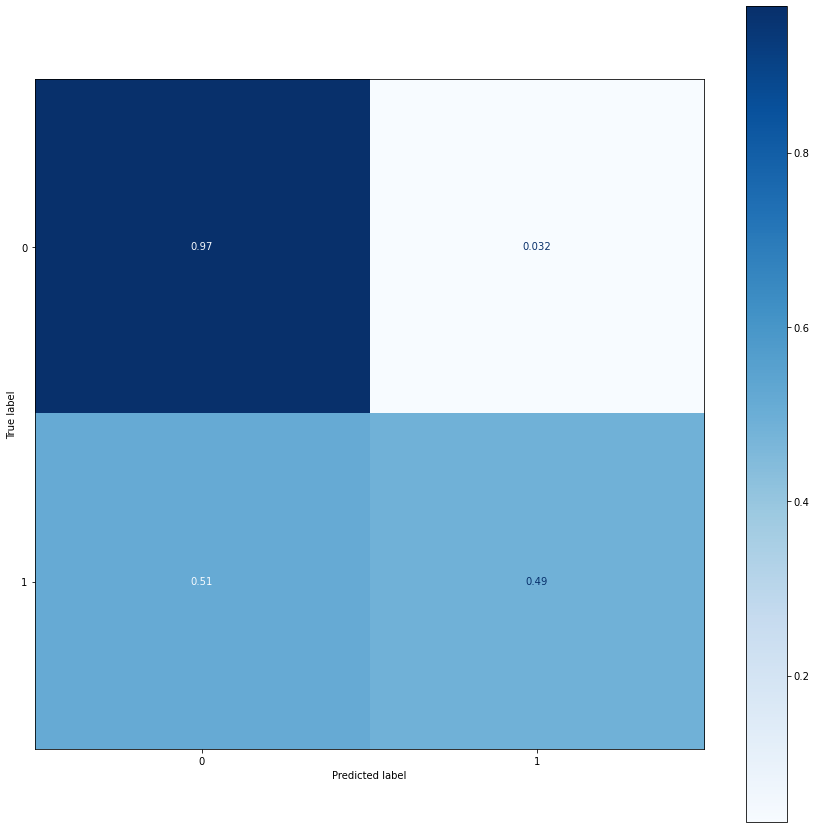

In [66]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(mlp, X_val, y_val, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [67]:
print(classification_report(y_val,predictions_val))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7249
           1       0.67      0.49      0.56       989

    accuracy                           0.91      8238
   macro avg       0.80      0.73      0.76      8238
weighted avg       0.90      0.91      0.90      8238



In [68]:
macro_recall = recall_score(y_val, predictions_val, average = 'macro')
print('Average recall score (macro): {0:0.2f}'.format(macro_recall))

Average recall score (macro): 0.73


In [69]:
micro_recall = recall_score(y_val, predictions_val, average = 'micro')
print('Average recall score (micro): {0:0.2f}'.format(micro_recall))

Average recall score (micro): 0.91


In [70]:
macro_f1score = f1_score(y_val, predictions_val, average = 'macro')
print('Average f1 socre (macro): {0:0.2f}'.format(macro_f1score))

Average f1 socre (macro): 0.76


In [71]:
micro_f1score = f1_score(y_val, predictions_val, average = 'micro')
print('Average f1 score (micro): {0:0.2f}'.format(micro_f1score))

Average f1 score (micro): 0.91


## Results for Test Data

In [72]:
predictions_test = mlp.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test, predictions_test)
print(cnf_matrix_test)

[[7098  228]
 [ 498  414]]


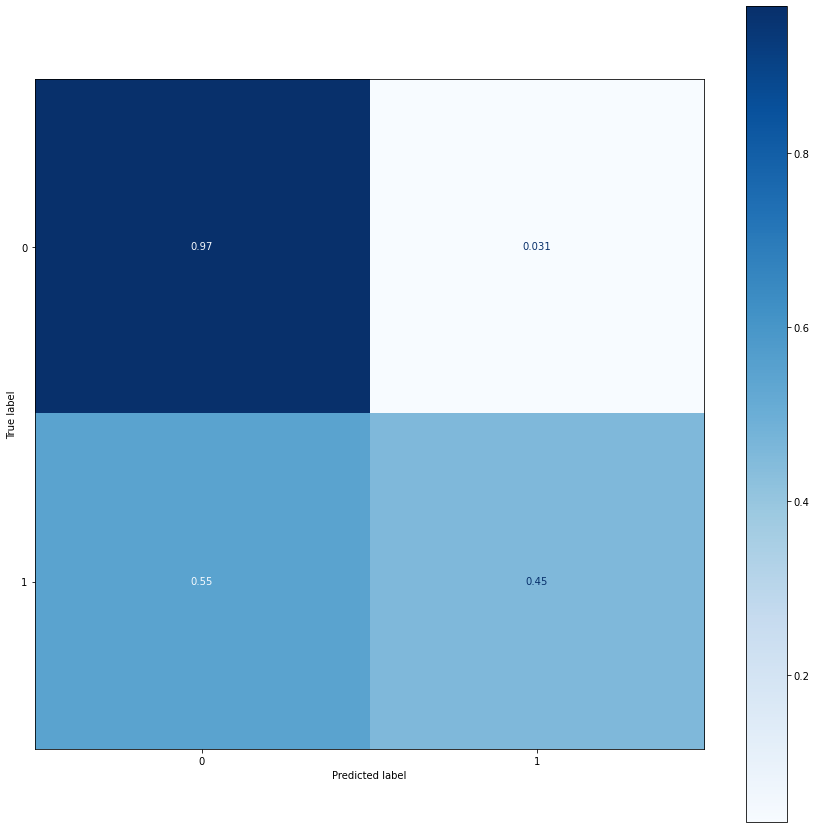

In [73]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(mlp, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [74]:
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7326
           1       0.64      0.45      0.53       912

    accuracy                           0.91      8238
   macro avg       0.79      0.71      0.74      8238
weighted avg       0.90      0.91      0.91      8238



In [75]:
macro_recall = recall_score(y_test, predictions_test, average = 'macro')
print('Average recall score (macro): {0:0.2f}'.format(macro_recall))

Average recall score (macro): 0.71


In [76]:
micro_recall = recall_score(y_test, predictions_test, average = 'micro')
print('Average recall score (micro): {0:0.2f}'.format(micro_recall))

Average recall score (micro): 0.91


In [77]:
macro_f1score = f1_score(y_test, predictions_test, average = 'macro')
print('Average f1 socre (macro): {0:0.2f}'.format(macro_f1score))

Average f1 socre (macro): 0.74


In [78]:
micro_f1score = f1_score(y_test, predictions_test, average = 'micro')
print('Average f1 score (micro): {0:0.2f}'.format(micro_f1score))

Average f1 score (micro): 0.91
